In [5]:
import numpy as np

from human_terms_network import Human_Terms_Network
from dataset_load import *
from lr_baseline import LRBaseline

In [6]:
np.random.seed(42)

from keras.layers import Input, Dense, TimeDistributed, Embedding
from keras.layers import Concatenate, Reshape, Lambda, Multiply, multiply, concatenate
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')

def open_pickle(path):
    import pickle
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

def load_unigrams(path, X, y):
    word_list = []
    connotation = {}
    
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            word_list.append(line.strip())
            
    for word in word_list:
        pos_count = 0
        neg_count = 0
        for i, doc in enumerate(X):
            if word in doc.lower():
                
                if (y[i] == 1):
                    pos_count += 1
                else:
                    neg_count += 1
                    
        if pos_count > neg_count:
            connotation[word] = 1
        else:
            connotation[word] = 0
    
    return word_list, connotation

def generate_appearance(X_train_corpus, X_test_corpus, word_list, connotation):
    y_train_agreement = []
    for i in range(len(X_train_corpus)):
        doc_agreement = []
        for word in word_list:
            if word in X_train_corpus[i]:
                if connotation[word] == 1:
                    doc_agreement.append(1)
                else:
                    doc_agreement.append(-1)
            else:
                doc_agreement.append(0)
        y_train_agreement.append(doc_agreement)
        
    y_test_agreement = []
    for i in range(len(X_test_corpus)):
        doc_agreement = []
        for word in word_list:
            if word in X_test_corpus[i]:
                if connotation[word] == 1:
                    doc_agreement.append(1)
                else:
                    doc_agreement.append(-1)
            else:
                doc_agreement.append(0)
        y_test_agreement.append(doc_agreement)
        
    return np.array(y_train_agreement), np.array(y_test_agreement)

# 'imdb-unigrams.txt'

X_train_original = open_pickle('../../data/imdb/imdb_original_preprocessed_xtrain.pickle')
X_test_original = open_pickle('../../data/imdb/imdb_original_preprocessed_xtest.pickle')
y_train_original = open_pickle('../../data/imdb/imdb_original_preprocessed_ytrain.pickle')
y_test_original = open_pickle('../../data/imdb/imdb_original_preprocessed_ytest.pickle')

# Count vectorizer 

from sklearn.feature_extraction.text import CountVectorizer

token = r"(?u)\b[\w\'/]+\b"
cv = CountVectorizer(min_df = 100, token_pattern=token, lowercase=True, binary=True)
X_train = cv.fit_transform(X_train_original)
X_test = cv.transform(X_test_original)

word_list, connotation = load_unigrams('./imdb-unigrams.txt', X_train_original, y_train_original)

y_train_agreement, y_test_agreement = generate_appearance(X_train_original, X_test_original, 
                                                          word_list, connotation)

In [7]:
av_baseline = LRBaseline(X_train_original, X_test_original, y_train_original, y_test_original, 
                           human_terms=word_list)

In [8]:
# (train, test)

print(av_baseline.baseline())
print(av_baseline.baseline(penalty='l1'))
print(av_baseline.human_terms_baseline())
print(av_baseline.human_terms_baseline(penalty='l2'))

(0.94536, 0.86476)
(0.9424, 0.87184)
(0.81476, 0.81072)
(0.81476, 0.81072)


In [7]:
X_train = av_baseline.baseline_cv.transform(X_train_corpus_update)
X_test = av_baseline.baseline_cv.transform(X_test_corpus_update)
y_train = y_train_amazon
y_test = y_test_amazon

In [9]:
imdb_htm = Human_Terms_Network(input_shape=X_train.shape[1],
                               human_terms_shape=len(word_list),
                                domain='imdb')

NameError: name 'X_train' is not defined

In [9]:
imdb_htm.set_data(X_train, X_test, y_train_agreement, y_test_agreement, y_train, y_test)
imdb_htm.train(epochs=10,)

Train on 16551 samples, validate on 8153 samples
Epoch 1/10
16551/16551 [==============================] - 40s 2ms/step - loss: 0.2770 - acc: 0.8442 - val_loss: 0.2438 - val_acc: 0.8890
Epoch 2/10
16551/16551 [==============================] - 40s 2ms/step - loss: 0.1993 - acc: 0.8882 - val_loss: 0.2259 - val_acc: 0.8912
Epoch 3/10
16551/16551 [==============================] - 39s 2ms/step - loss: 0.1782 - acc: 0.9051 - val_loss: 0.2356 - val_acc: 0.8816
Epoch 4/10
16551/16551 [==============================] - 39s 2ms/step - loss: 0.1672 - acc: 0.9114 - val_loss: 0.2322 - val_acc: 0.8955
Epoch 5/10
16551/16551 [==============================] - 39s 2ms/step - loss: 0.1562 - acc: 0.9178 - val_loss: 0.2360 - val_acc: 0.8933
Epoch 6/10
16551/16551 [==============================] - 38s 2ms/step - loss: 0.1493 - acc: 0.9228 - val_loss: 0.2424 - val_acc: 0.8883
Epoch 7/10
16551/16551 [==============================] - 39s 2ms/step - loss: 0.1453 - acc: 0.9265 - val_loss: 0.2464 - val_acc:

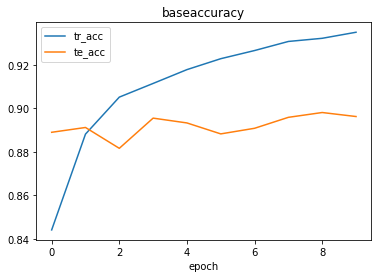

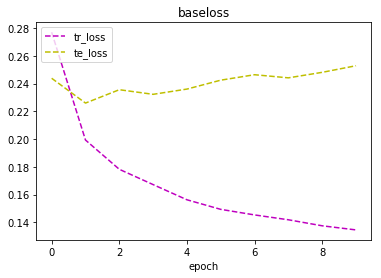

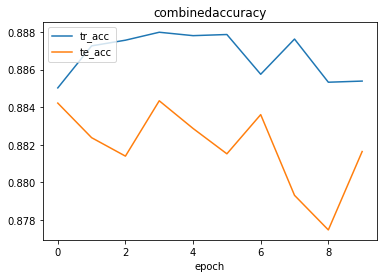

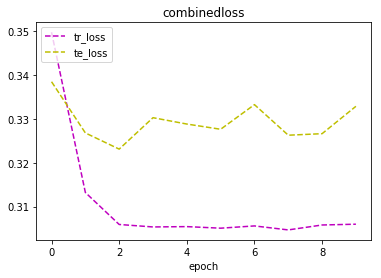

<Figure size 432x288 with 0 Axes>

In [19]:
test_eval = amazon_htm.combined.evaluate([X_test, amazon_htm.y_test_agreement], amazon_htm.y_test)

8235/8235 [==============================] - 1s 73us/step


In [20]:
test_eval

[0.3306498222953273, 0.8830601092823795]

In [21]:
amazon_htm.test(reject=True)

3636/3636 [==============================] - 0s 76us/step


([0.1953965602747548, 0.8932893290640366], 0.5584699453551912)

In [14]:
amazon_htm.X_test.shape

(8235, 1648)

In [15]:
amazon_htm.y_test_agreement.shape

(8235, 30)

In [16]:
amazon_htm.y_test.shape

(8235,)